In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [3]:
folder = '~/workspace/Ploting/PhD_Thesis/Calibration/ParameterMap/'

# Run 900120 - 200 mV Muon Run

In [4]:
folder = '~/workspace/Ploting/PhD_Thesis/Calibration/ParameterMap/'
inf = 'systematics_results_Run-900120_third_run.csv'

In [5]:
df_900120 = pd.read_csv(folder+inf)
df_900120.tail()

,Unnamed: 0,WaveformDecomposition.stop_methode,WaveformDecomposition.stop_region,WaveformDecomposition.threshold,WaveformDecomposition.fwhm,WaveformDecomposition.search_range,WaveformDecomposition.search_edge,MipTimeRetrieval.window_threshold,MipTimeRetrieval.window_length,MipTimeRetrieval.timing_type,MipTimeRetrieval.constant_fraction,MipTimeRetrieval.pe_hit_time,SystematicsStudy.threshold_tres,SystematicsStudy.range_time,MPV_1,MPV_2,MPV_3,MPV_4,TRes,TRes_shift
17275,17275,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.5,10,0.329923,0.338398,0.329295,0.286232,1.215895,-0.157301
17276,17276,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,4,0.329923,0.338398,0.329295,0.286232,1.080567,-0.219637
17277,17277,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,6,0.329923,0.338398,0.329295,0.286232,1.071816,-0.212932
17278,17278,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,8,0.329923,0.338398,0.329295,0.286232,1.071508,-0.212783
17279,17279,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,10,0.329923,0.338398,0.329295,0.286232,1.071508,-0.212783


In [6]:
df_900120['WaveformDecomposition.threshold'].describe()

count    17280.000000
mean         2.500000
std          1.414254
min          0.500000
25%          1.500000
50%          2.500000
75%          3.500000
max          4.500000
Name: WaveformDecomposition.threshold, dtype: float64

In [12]:
df_900120 = df_900120.drop(['Unnamed: 0','WaveformDecomposition.stop_methode','WaveformDecomposition.stop_region','WaveformDecomposition.search_range','WaveformDecomposition.search_edge'], axis=1)

KeyError: "labels ['Unnamed: 0' 'WaveformDecomposition.stop_methode'\n 'WaveformDecomposition.stop_region' 'WaveformDecomposition.search_range'\n 'WaveformDecomposition.search_edge'] not contained in axis"

In [13]:
df_900120.columns

Index(['WaveformDecomposition.threshold', 'WaveformDecomposition.fwhm',
       'MipTimeRetrieval.window_threshold', 'MipTimeRetrieval.window_length',
       'MipTimeRetrieval.timing_type', 'MipTimeRetrieval.constant_fraction',
       'MipTimeRetrieval.pe_hit_time', 'SystematicsStudy.threshold_tres',
       'SystematicsStudy.range_time', 'MPV_1', 'MPV_2', 'MPV_3', 'MPV_4',
       'TRes', 'TRes_shift'],
      dtype='object')

In [19]:
# Physical values
df_900120 = df_900120[(df_900120['TRes']>=0) & (df_900120['TRes']<=100)]

In [20]:
df_900120['TRes'].describe()

count    17106.000000
mean         1.415086
std          1.808668
min          0.465538
25%          1.071508
50%          1.214388
75%          1.401980
max         40.911192
Name: TRes, dtype: float64

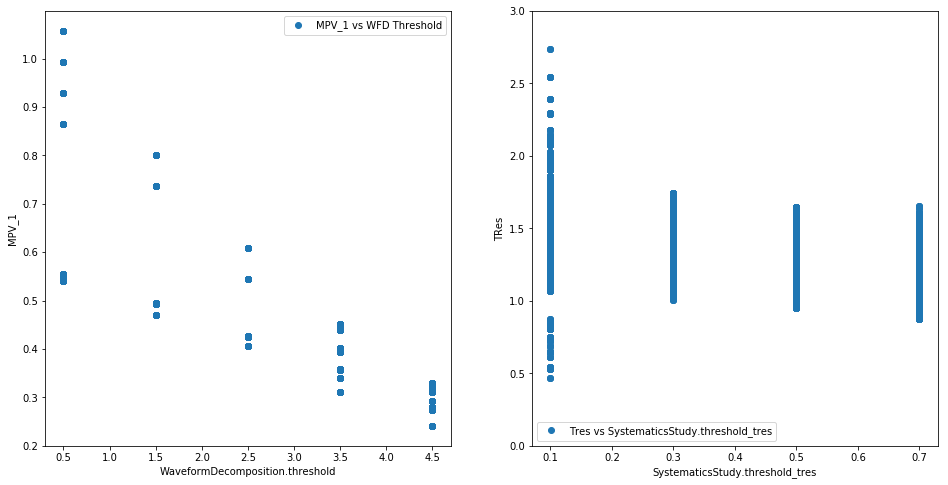

In [23]:
fig =plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
df_900120.plot(x='WaveformDecomposition.threshold',y='MPV_1', ax = ax, style='o', label='MPV_1 vs WFD Threshold')
ax.set_xlabel('WaveformDecomposition.threshold')
ax.set_ylabel('MPV_1')
plt.legend()
ax2 = fig.add_subplot(122)
df_900120.plot(x='SystematicsStudy.threshold_tres',y='TRes', ax = ax2, style='o', label='Tres vs SystematicsStudy.threshold_tres', ylim=(0,3))
ax2.set_xlabel('SystematicsStudy.threshold_tres')
ax2.set_ylabel('TRes')
plt.legend()
plt.savefig(inf[:-4]+'_MPV_1VsWDThres.pdf')

### Do some data cleaning

In [24]:
# Time
df_900120 = df_900120[(df_900120['TRes']>=0) & (df_900120['TRes']<=3)]
df_900120 = df_900120[(df_900120['SystematicsStudy.threshold_tres']<=0.5)]

In [25]:
#df_900120 = df_900120[df_900120['MipTimeRetrieval.timing_type'] == 'pe hit time']

In [26]:
#df_900120 = df_900120[(df_900120['TRes']>=0) & (df_900120['TRes']<=1)& (df_900120['SystematicsStudy.threshold_tres']<=0.2)]

In [27]:
# MPV
low = 0.5
up = 1.5
df_900120 = df_900120[(df_900120['MPV_1']>= low)&(df_900120['MPV_1']<= up)&(df_900120['MPV_2']>= low)&(df_900120['MPV_2']<= up)&(df_900120['MPV_3']>= low)&(df_900120['MPV_3']<= up)&(df_900120['MPV_4']>= low)& (df_900120['MPV_4'] <= up)]


In [30]:
print('TRes summary: ')
print(df_900120['TRes'].describe())
print('')
print('TRes_shift summary: ')
print(df_900120['TRes_shift'].describe())
print('')
print('MPV_1 summary: ')
print(df_900120['MPV_1'].describe())
print('')
print('MPV_2 summary: ')
print(df_900120['MPV_2'].describe())
print('')
print('MPV_3 summary: ')
print(df_900120['MPV_3'].describe())
print('')
print('MPV_4 summary: ')
print(df_900120['MPV_4'].describe())

print('Minimum time resolution:')
print( df_900120.ix[df_900120['TRes'].idxmin()] )


TRes summary: 
count    3915.000000
mean        1.243603
std         0.222317
min         0.465538
25%         1.106608
50%         1.199068
75%         1.365466
max         2.735483
Name: TRes, dtype: float64

TRes_shift summary: 
count    3915.000000
mean       -0.289062
std         0.185114
min        -1.827602
25%        -0.374463
50%        -0.295663
75%        -0.178204
max         0.477080
Name: TRes_shift, dtype: float64

MPV_1 summary: 
count    3915.000000
mean        0.829051
std         0.125674
min         0.608892
25%         0.737097
50%         0.801200
75%         0.993507
max         1.057610
Name: MPV_1, dtype: float64

MPV_2 summary: 
count    3915.000000
mean        0.761716
std         0.134442
min         0.515913
25%         0.664305
50%         0.742430
75%         0.898680
max         0.976805
Name: MPV_2, dtype: float64

MPV_3 summary: 
count    3915.000000
mean        0.807164
std         0.119523
min         0.566755
25%         0.766755
50%         0.76675

/home/iwsatlas1/mgabriel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


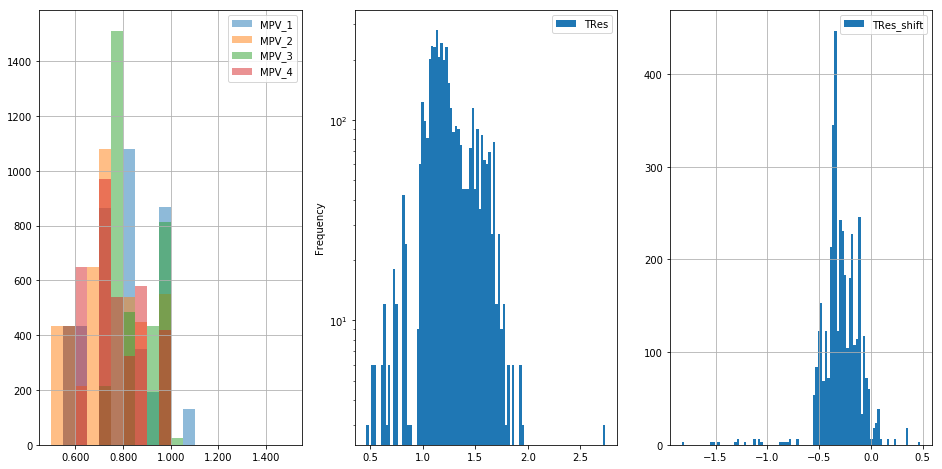

In [31]:

fig =plt.figure(figsize=(16,8))
ax = fig.add_subplot(131)
bins=20
df_900120['MPV_1'].hist(ax = ax, label='MPV_1', alpha=.5,range=(low,up), bins=bins)
df_900120['MPV_2'].hist(ax = ax, label='MPV_2', alpha=.5,range=(low,up), bins=bins)
df_900120['MPV_3'].hist(ax = ax, label='MPV_3', alpha=.5,range=(low,up), bins=bins)
df_900120['MPV_4'].hist(ax = ax, label='MPV_4', alpha=.5,range=(low,up), bins=bins)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

ax2 = fig.add_subplot(132)
df_900120['TRes'].plot(kind='hist', ax = ax2, label='TRes', bins=100, logy=True)
#ax2.get_yaxis().get_major_formatter().set_useOffset(False)
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

ax3 = fig.add_subplot(133)
df_900120['TRes_shift'].hist(ax = ax3, label='TRes_shift', bins=100)
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()


plt.savefig(inf[:-4]+'_results.pdf')


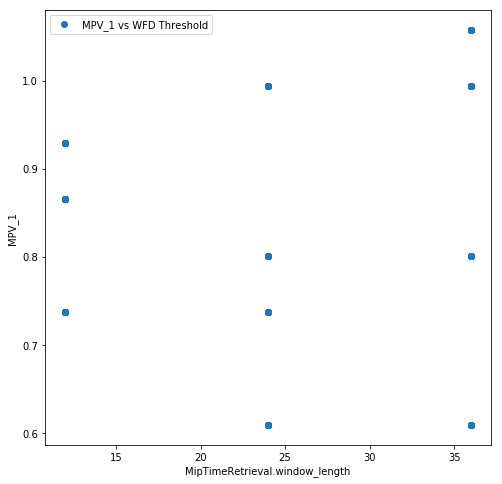

In [34]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
df_900120.plot(x='MipTimeRetrieval.window_length',y='MPV_1', ax = ax, style='o', label='MPV_1 vs WFD Threshold')
ax.set_xlabel('MipTimeRetrieval.window_length')
ax.set_ylabel('MPV_1')
plt.legend()

### PE Hit time vs Constant fraction

count    1959.000000
mean        1.237010
std         0.214433
min         0.465538
25%         1.114352
50%         1.206373
75%         1.344746
max         2.735483
Name: TRes, dtype: float64


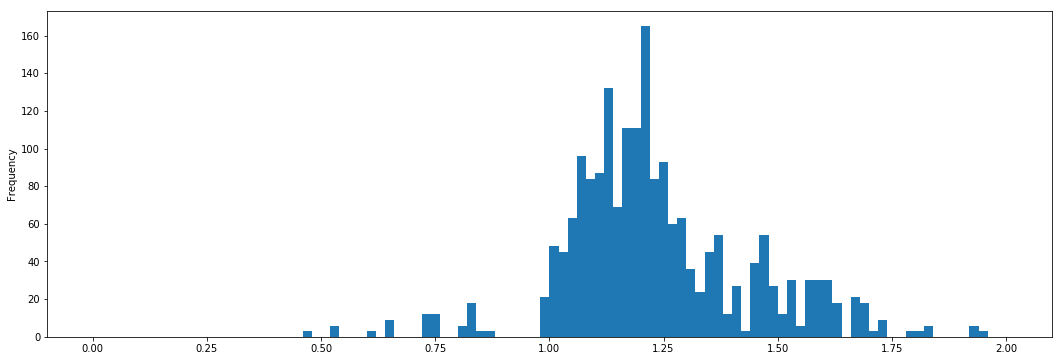

In [16]:
print(df_900120[df_900120['MipTimeRetrieval.timing_type']=='pe hit time']['TRes'].describe())
fig =plt.figure(figsize=(18,6))
df_900120[df_900120['MipTimeRetrieval.timing_type']=='pe hit time']['TRes'].plot(kind='hist', bins=100, range=(0,2.0))

count    1956.000000
mean        1.250207
std         0.229808
min         0.542343
25%         1.095755
50%         1.186295
75%         1.425316
max         1.856262
Name: TRes, dtype: float64


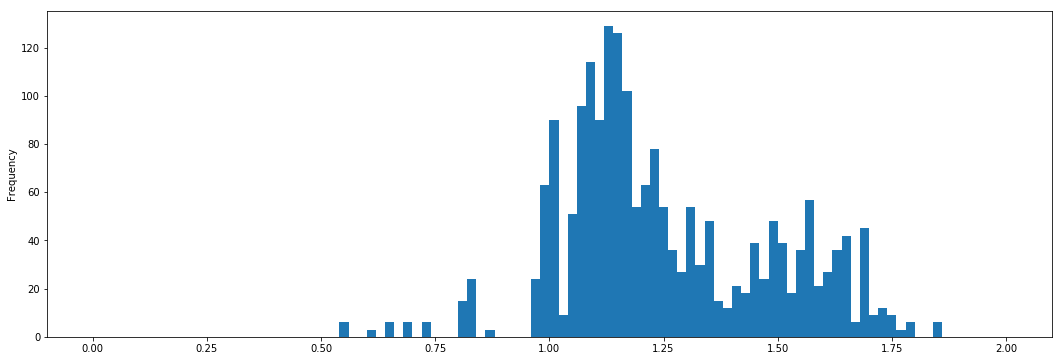

In [35]:
print(df_900120[df_900120['MipTimeRetrieval.timing_type']=='constant fraction']['TRes'].describe())
fig =plt.figure(figsize=(18,6))
df_900120[df_900120['MipTimeRetrieval.timing_type']=='constant fraction']['TRes'].plot(kind='hist', bins=100, range=(0,2.0))

### Pairplot & Heatmap

<Figure size 432x288 with 0 Axes>

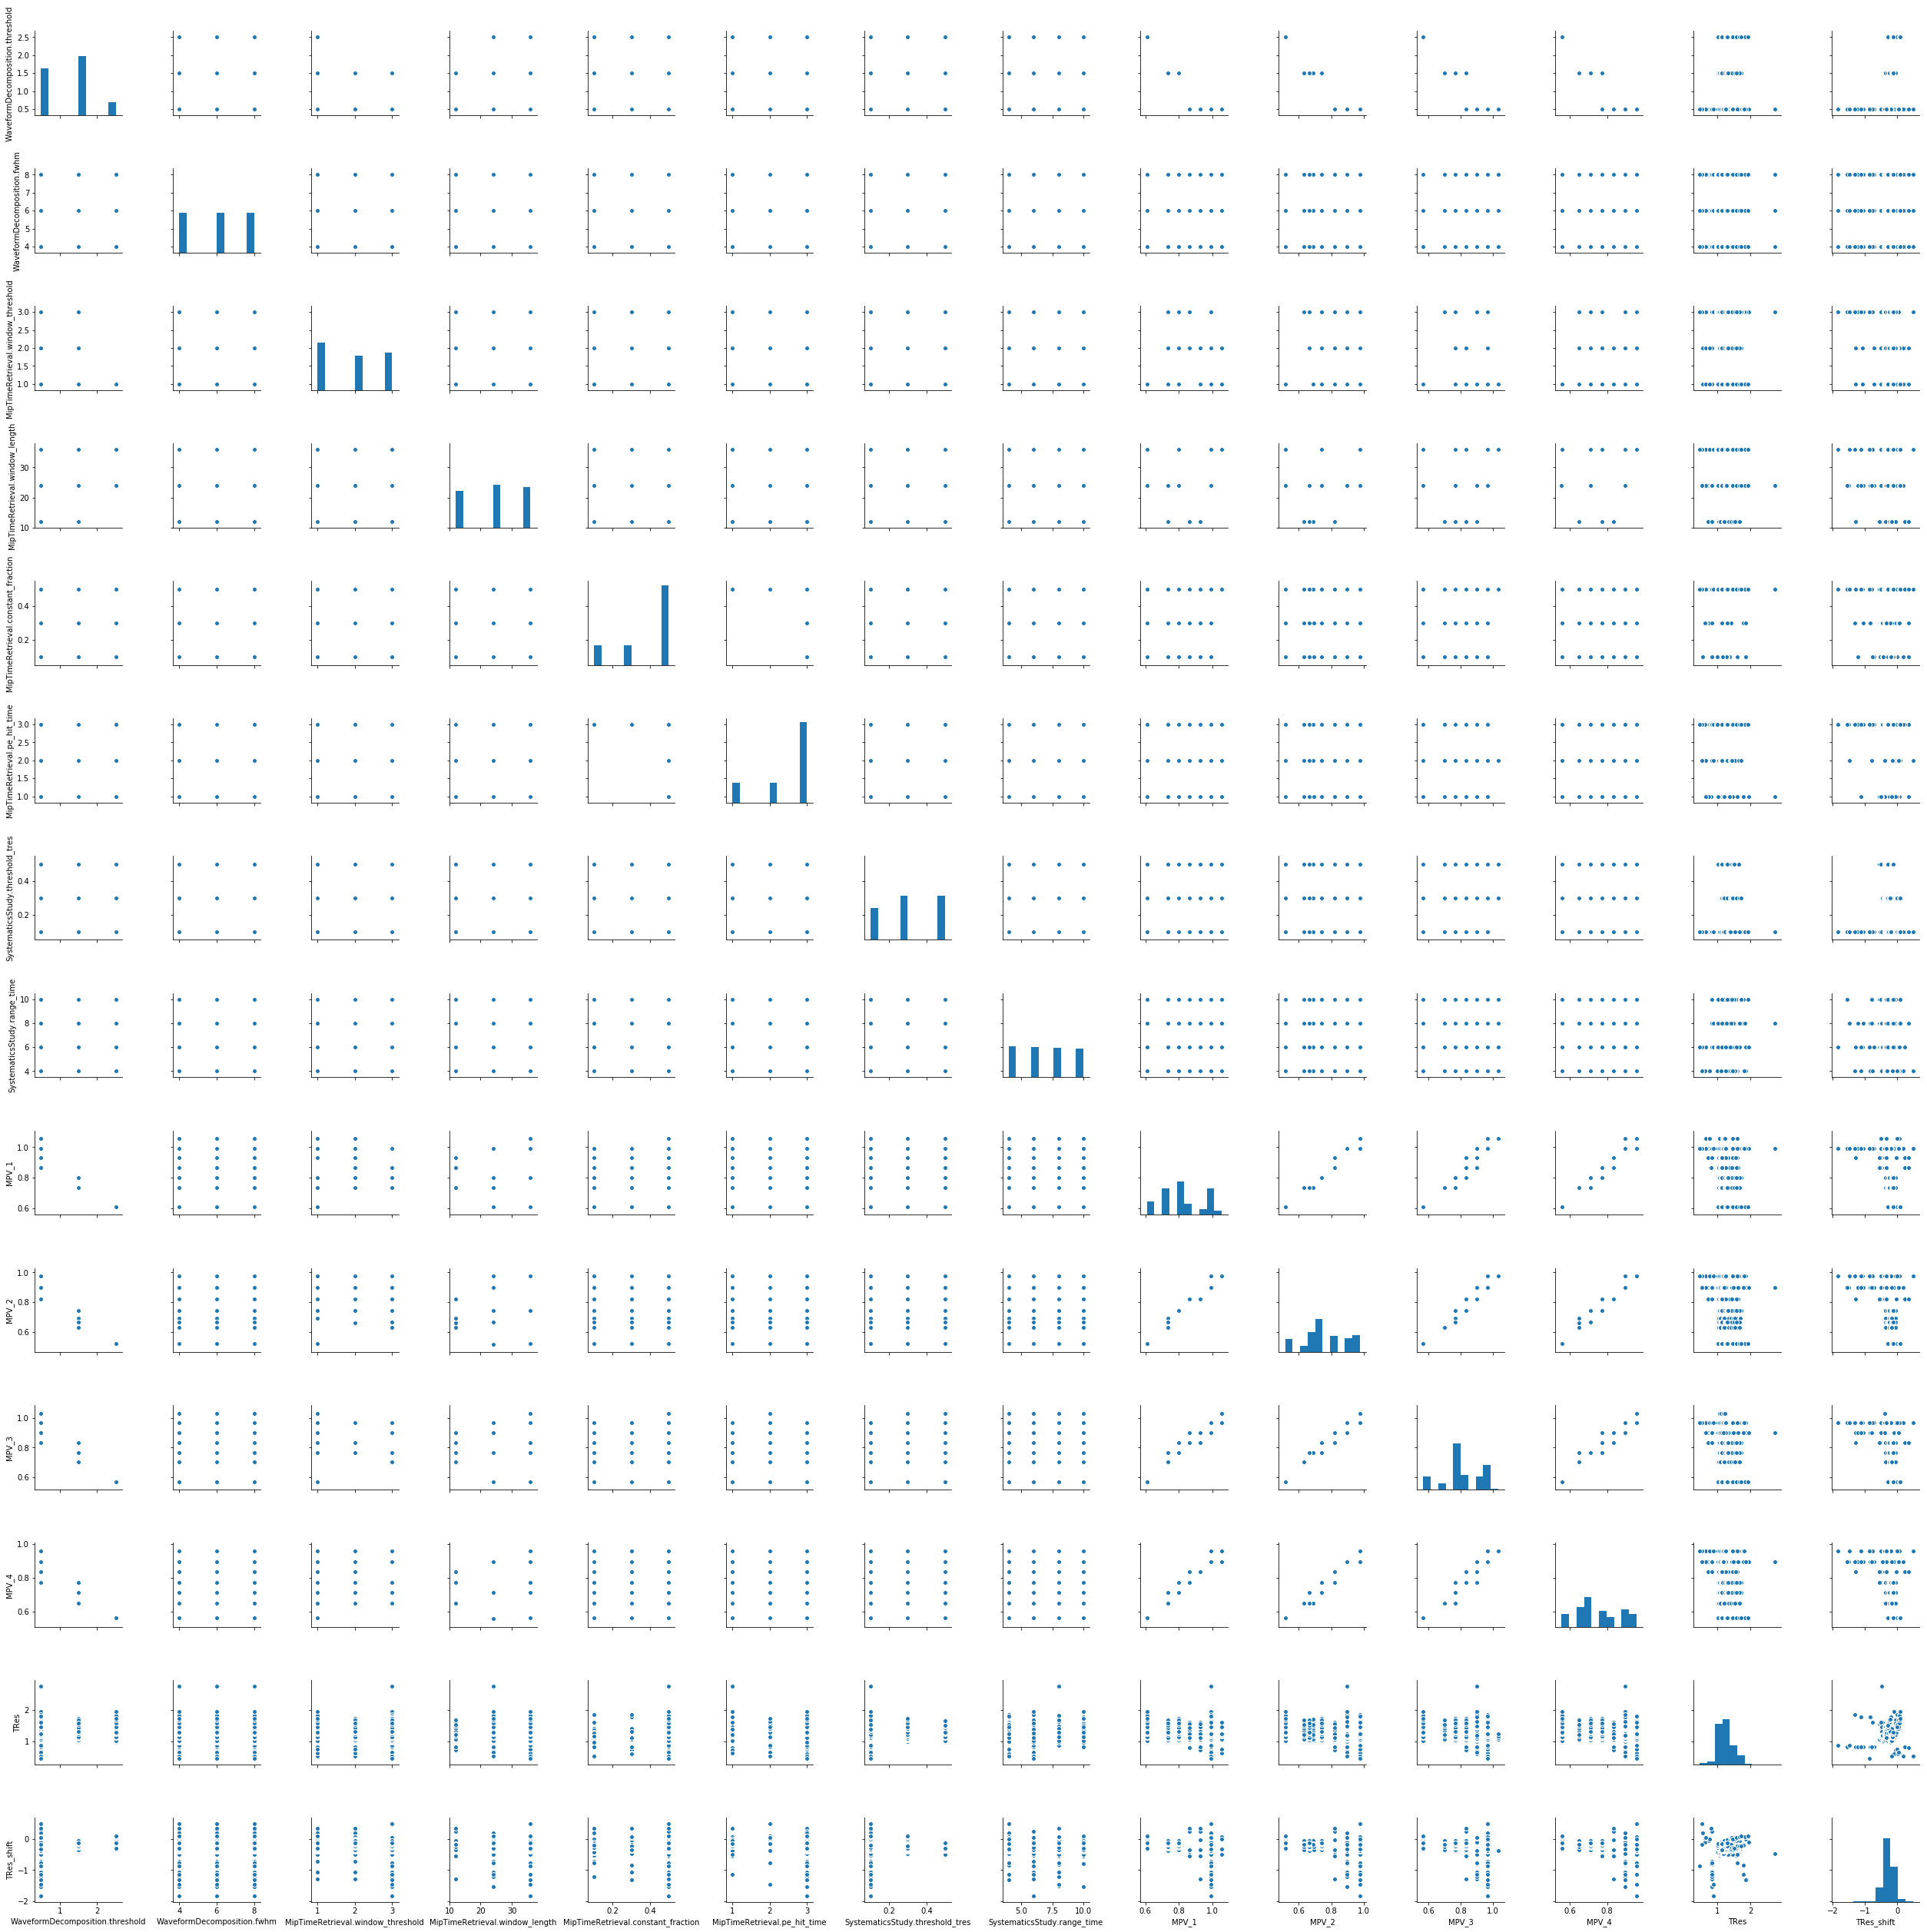

In [36]:
plt.figure()
#sns.pairplot(data=df,hue="Survived", dropna=True)
sns.pairplot(data=df_900120)
plt.savefig(inf[:-4]+'_pairplot.pdf')

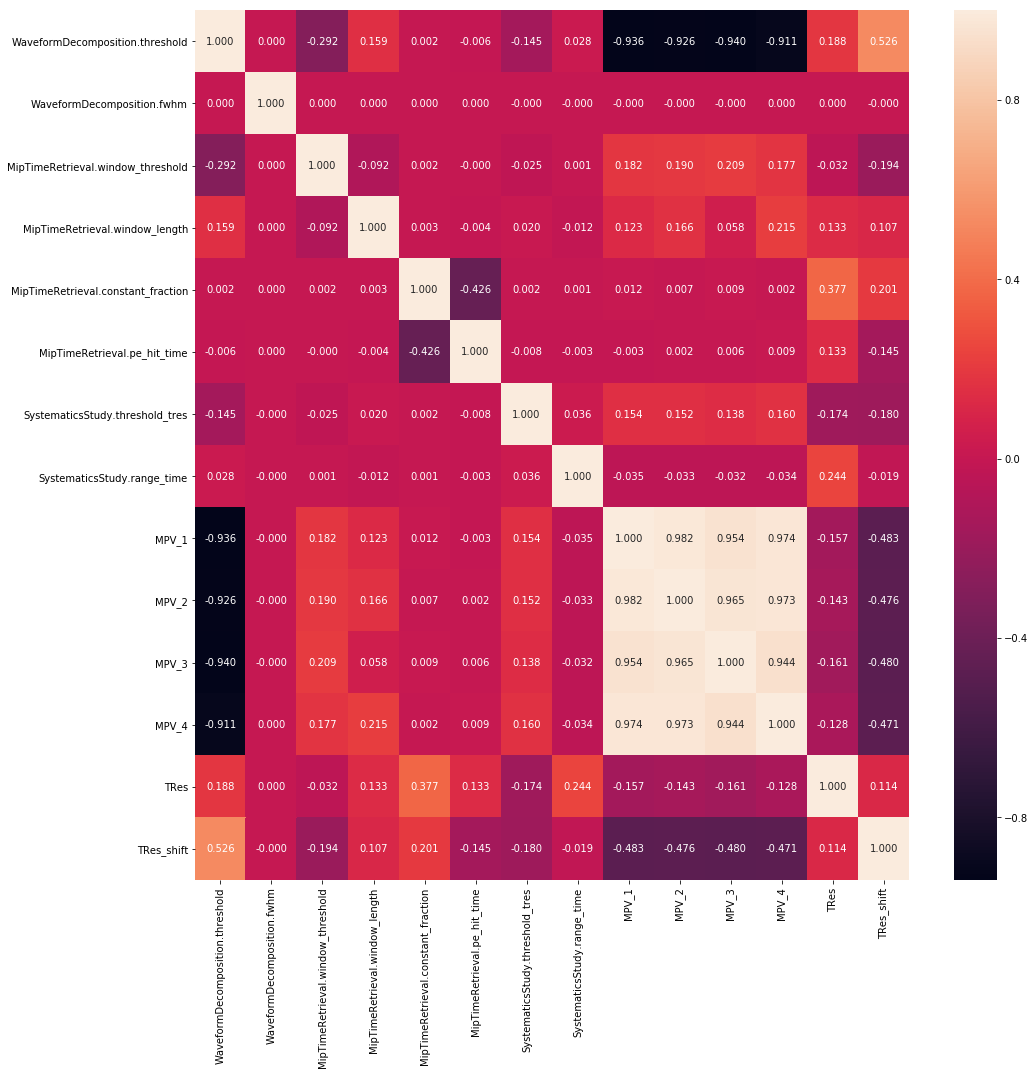

In [37]:
plt.figure(figsize=(16,16))
sns.heatmap(df_900120.corr(), annot=True, fmt=".3f")
plt.savefig(inf[:-4]+'_heatmap.pdf')